## Import some useful packages

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
from setdir import *

### Set paths and time limits

In [6]:
data_folder = 'data'
file_name = 'response_1640617898644.txt' # Still problematic
file_name = 'response_1640618182770.txt'

input_file = cat_data_path(data_folder, file_name)

figdir = create_figdir()

# Time limits
datestart = '2021-12-12'
#tstart = time.mktime(datetime.datetime.strptime(datestart,'%Y-%m-%d').timetuple())
tstart = pd.Timestamp('2021-12-12T00')


In [7]:
figdir

'../results/figfiles/2021-12'

### Formats for plotting

In [158]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

## Load data

In [159]:
data_file = pd.read_csv(input_file)

data_file.head()

,timestamp,sci_water_pressure,sci_water_temp,derived_salinity
0,1513348006979,0.011,18.820299,33.907894
1,1513348017091,0.011,18.817400,33.909938
2,1513348027165,0.012,18.818600,33.908950
3,1513348037275,0.011,18.818199,33.909115
4,1513348047421,0.012,18.818600,33.909955


### Fix format of time and change units on pressure

In [160]:
# Convert to timestamp in pandas
data_file['time'] = data_file.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x*0.001))
data_file.head()

,timestamp,sci_water_pressure,sci_water_temp,derived_salinity,time
0,1513348006979,0.011,18.820299,33.907894,2017-12-15 14:26:46.979
1,1513348017091,0.011,18.817400,33.909938,2017-12-15 14:26:57.091
2,1513348027165,0.012,18.818600,33.908950,2017-12-15 14:27:07.165
3,1513348037275,0.011,18.818199,33.909115,2017-12-15 14:27:17.275
4,1513348047421,0.012,18.818600,33.909955,2017-12-15 14:27:27.421


In [161]:
# Cut data to post deployment
data_file_2021 = data_file[data_file.time>=tstart].copy()

data_file_2021.head()

,timestamp,sci_water_pressure,sci_water_temp,derived_salinity,time
1000,1639355681415,-0.009,-0.0577,32.312741,2021-12-13 00:34:41.415
1001,1639355691487,-0.024,-0.0563,32.312667,2021-12-13 00:34:51.487
1002,1639355701631,-0.020,-0.0604,32.312763,2021-12-13 00:35:01.631
1003,1639355711673,-0.024,-0.0589,32.312517,2021-12-13 00:35:11.673
1004,1639355721731,-0.025,-0.0619,32.312663,2021-12-13 00:35:21.731


In [162]:
# Change pressure from bars to dbars
data_file_2021['pressure_dbar'] =  data_file_2021.sci_water_pressure * 10


In [163]:
max_time = data_file_2021.time.max()
print([max_time, max_time + datetime.timedelta(days=-1)])
type(max_time)
data_lastday = data_file_2021[data_file_2021.time>=(max_time+datetime.timedelta(days=-1))]
data_lastday.head()

[Timestamp('2021-12-27 13:15:07.801000'), Timestamp('2021-12-26 13:15:07.801000')]


,timestamp,sci_water_pressure,sci_water_temp,derived_salinity,time,pressure_dbar
89708,1640524514816,63.317001,4.3214,34.899801,2021-12-26 13:15:14.816,633.170013
89709,1640524525824,63.410000,4.3199,34.899138,2021-12-26 13:15:25.824,634.099998
89710,1640524536834,63.526001,4.3215,34.899316,2021-12-26 13:15:36.834,635.260010
89711,1640524547844,63.619999,4.3019,34.895871,2021-12-26 13:15:47.844,636.199989
89712,1640524558852,63.735001,4.2850,34.895695,2021-12-26 13:15:58.852,637.350006


# Plot full mission length

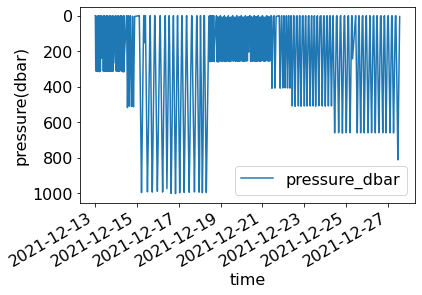

In [164]:
# Plot pressure against time
data_file_2021.plot(x='time', y='pressure_dbar', ylabel='pressure(dbar)')
plt.gca().invert_yaxis()
plt.show()

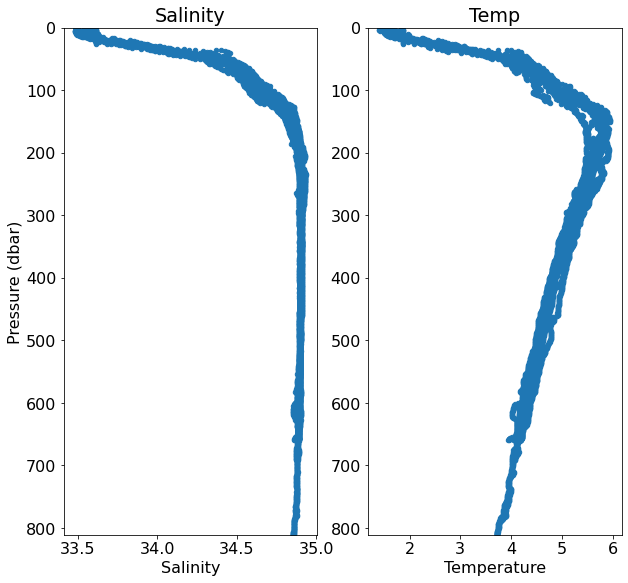

In [165]:
# Setting plot aspect ratios
def forceAspect(ax,ratio=1):
    xleft, xright = ax.get_xlim()
    ybottom, ytop = ax.get_ylim()
    ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

# Maximum pressure for plot limits
maxp = data_lastday.sci_water_pressure.max()*10

# Profile plot of recent data
axes = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
ax1 = plt.subplot(1,2,1)
data_lastday.plot.scatter(y='pressure_dbar',x='derived_salinity', 
                          ax=ax1,
                         ylabel='Pressure (dbar)',xlabel='Salinity',
                         title='Salinity')
ax1.invert_yaxis()
ax1.set_ylim([maxp,0])
forceAspect(ax1,ratio=2)
ax2 = plt.subplot(1,2,2)
data_lastday.plot.scatter(y='pressure_dbar',x='sci_water_temp',
                         ax=ax2,
                         xlabel='Temperature',title='Temp',ylabel='')
ax2.invert_yaxis()
ax2.set_ylim([maxp,0])
forceAspect(ax2,ratio=2)


#xleft, xright = ax2.get_xlim()
#ybottom, ytop = ax2.get_ylim()
#ax2.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)


## Plot most recent days                                                                                

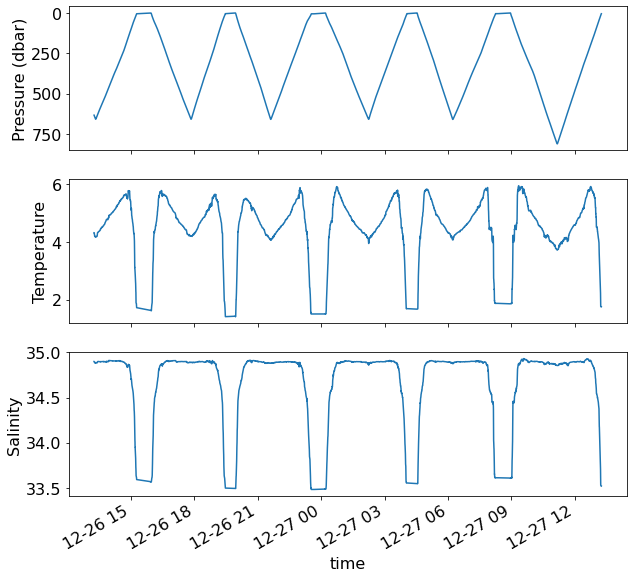

In [166]:
axes = plt.subplots(nrows=3, ncols=1,figsize=(10,10))

# Pressure
ax1 = plt.subplot(3,1,1)
data_lastday.plot(y='pressure_dbar',x='time', 
                          ax=ax1,
                         ylabel='Pressure (dbar)',xlabel='')
ax1.xaxis.set_ticklabels([])
ax1.invert_yaxis()
ax1.get_legend().remove()

# Temperature
ax2 = plt.subplot(3,1,2)
data_lastday.plot(x='time',y='sci_water_temp',
                  ax=ax2,
                  xlabel='',ylabel='Temperature')
ax2.xaxis.set_ticklabels([])
ax2.get_legend().remove()

# Salnity
ax3 = plt.subplot(3,1,3)
data_lastday.plot(x='time',y='derived_salinity',
                  ax=ax3,
                  ylabel='Salinity')
ax3.get_legend().remove()

